<a href="https://colab.research.google.com/github/raphateixeira/TE-Controle/blob/main/RNA_y%3Dax%2Bb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

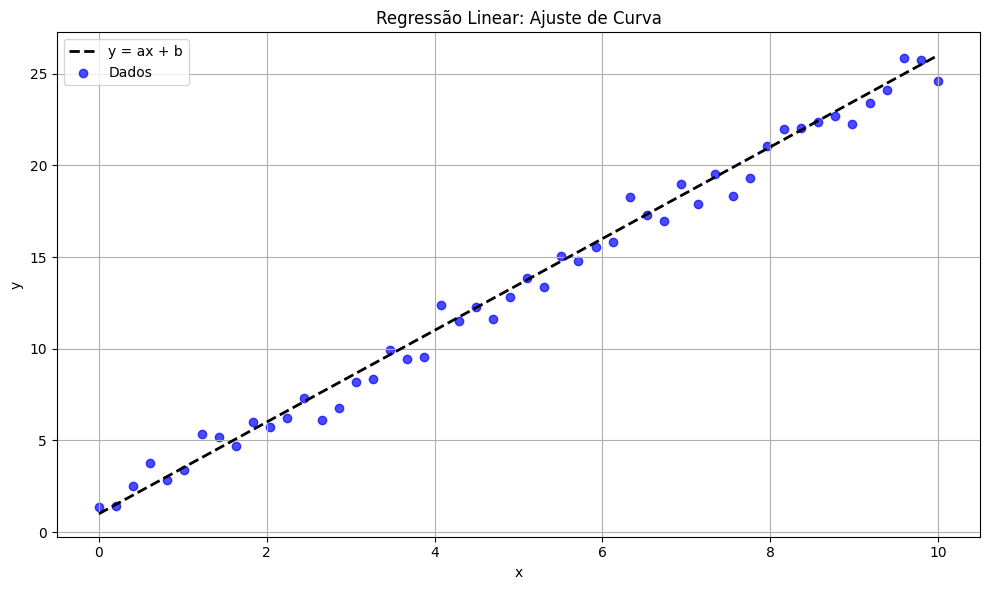

In [ ]:
# Parâmetros da reta:
a = 2.5
b = 1.0
Ns = 50

# Gerar X e y com ruído
np.random.seed(42)  # Para reprodutibilidade
x = np.linspace(0, 10, Ns)
r = np.random.randn(Ns) * 0.8  # Adiciona ruído gaussiano
y = a * x + b
ym = y + r

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k--', linewidth=2, label='y = ax + b')
plt.scatter(x, ym, label='Dados', color='blue', alpha=0.7)
plt.title('Regressão Linear: Ajuste de Curva')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# --- 2. Modelo Linear: Mínimos quadrados:
theta = np.polyfit(x, ym, 1)
a1 = theta[0]
b1 = theta[1]

# Previsões
y1 = a1 * x + b1

# Cálculo do MSE
mse1 = mean_squared_error(ym, y1)

In [ ]:
# RNA: 1 neurônio, 1 entrada, ativação linear:

RNA = Sequential(name="Perceptron_Linear")
RNA.add(Dense(1, input_shape=(1,), activation ='linear'))

optimizer = Adam(learning_rate=0.01)
RNA.compile(optimizer=optimizer, loss='mean_squared_error')

--- Treinando Rede Neural (Keras) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Parâmetros encontrados (Keras): w = 2.1985, b = 2.6708
MSE (Keras): 1.2108

--- Comparação ---
Parâmetros Reais:    a = 2.5000, b = 1.0000
Parâmetros NumPy:    a = 2.4536, b = 1.0516 (MSE: 0.5281)
Parâmetros Keras:    w = 2.1985, b = 2.6708 (MSE: 1.2108)


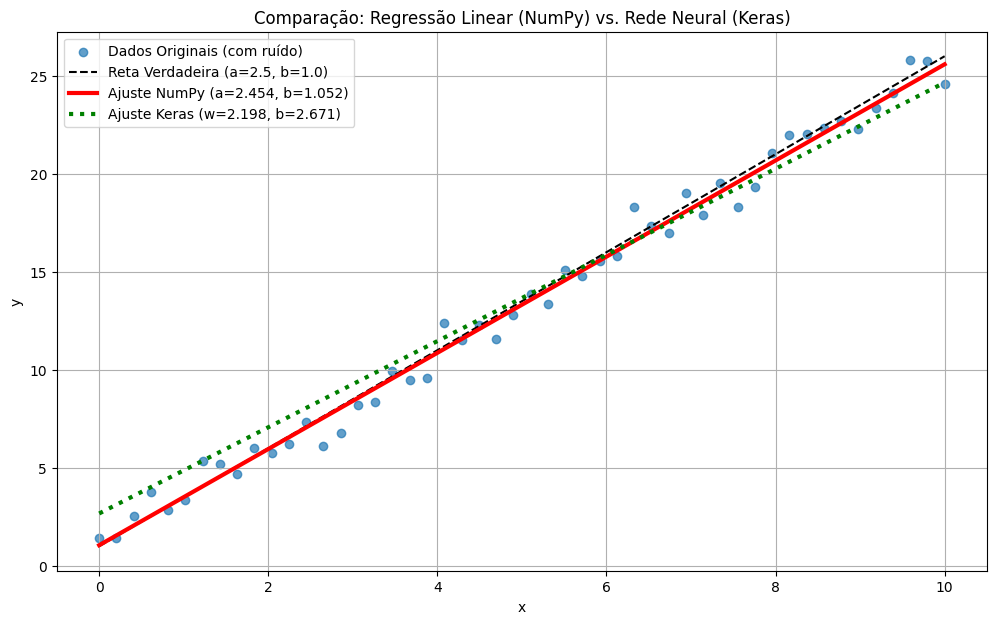

In [ ]:
# Usamos um otimizador (Adam) e a função de custo (MSE)


# Treinamento
# verbose=0 para não poluir a saída
history = model_keras.fit(x_data_keras, y_data, epochs=500, verbose=0)

# Previsões
y_pred_keras = model_keras.predict(x_data_keras).flatten() # .flatten() para voltar a ser 1D

# Cálculo do MSE
mse_keras = mean_squared_error(y_data, y_pred_keras)

# Extrair pesos
# model.layers[0].get_weights() retorna [array_de_pesos (w), array_de_bias (b)]
pesos_keras = model_keras.layers[0].get_weights()
w_keras = pesos_keras[0][0][0]  # O peso 'w' (equivalente ao 'a')
b_keras = pesos_keras[1][0]    # O bias 'b'

print(f"Parâmetros encontrados (Keras): w = {w_keras:.4f}, b = {b_keras:.4f}")
print(f"MSE (Keras): {mse_keras:.4f}\n")


# --- 4. Comparação e Visualização ---

print("--- Comparação ---")
print(f"Parâmetros Reais:    a = {a_v:.4f}, b = {b_v:.4f}")
print(f"Parâmetros NumPy:    a = {a_numpy:.4f}, b = {b_numpy:.4f} (MSE: {mse_numpy:.4f})")
print(f"Parâmetros Keras:    w = {w_keras:.4f}, b = {b_keras:.4f} (MSE: {mse_keras:.4f})")

plt.figure(figsize=(12, 7))
plt.scatter(x_data, y_data, label='Dados Originais (com ruído)', alpha=0.7)
plt.plot(x_data, (a_v * x_data) + b_v, 'k--', label=f'Reta Verdadeira (a={a_v}, b={b_v})')
plt.plot(x_data, y_pred_numpy, 'r-', linewidth=3, label=f'Ajuste NumPy (a={a_numpy:.3f}, b={b_numpy:.3f})')
plt.plot(x_data, y_pred_keras, 'g:', linewidth=3, label=f'Ajuste Keras (w={w_keras:.3f}, b={b_keras:.3f})')
plt.title('Comparação: Regressão Linear (NumPy) vs. Rede Neural (Keras)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

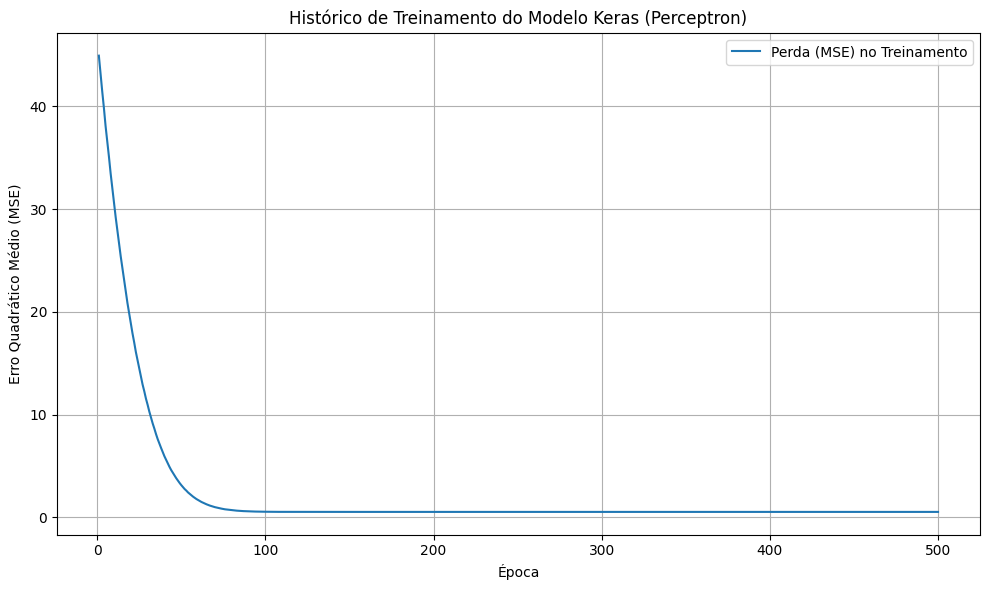

In [ ]:
# --- Gráfico 2: Histórico de Treinamento (Perda/MSE) ---
plt.figure(figsize=(10, 6))
loss_history = history.history['loss']
epochs_range = range(1, len(loss_history) + 1)
plt.plot(epochs_range, loss_history, label='Perda (MSE) no Treinamento')
plt.title('Histórico de Treinamento do Modelo Keras (Perceptron)')
plt.xlabel('Época')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout() # Ajusta o layout para evitar sobreposição

# Exibe todos os gráficos criados
plt.show()